In [1]:
import os
import glob
import pandas as pd
import numpy as np
import logging
#import esmvalcore.preprocessor
import xarray as xr
from xmip.preprocessing import rename_cmip6
import matplotlib.path as mpath
import matplotlib.pyplot as plt
import cftime
import matplotlib
matplotlib.rcParams.update({'font.size': 14})
import warnings
warnings.filterwarnings('ignore')

In [2]:
Rho_s = 1769.0 #kgm-3, Mann et al., 2010
modes = ['Nucleation', 'Aitken', 'Accumulation', 'Course']

sigma = {'Nucleation':1.59,
         'Aitken':1.59,
         'Accumulation':1.4,
         'Course':2} # Walters et al. 2019, table 4

avgdro = 6.022E23
molar_mass_air = 0.0289647 # kg/mol
molecules_air_per_kg = avgdro/molar_mass_air

In [3]:
def get_ds(run, var):
    path = '/gws/nopw/j04/moghli/postprocessed_ncs/{r}/{v}/'.format(r=run, v=var)
    ds_list = []
    for file in os.listdir(path):
        ds_list.append(xr.open_dataset(path+file))
    ds = xr.concat(ds_list, dim='time').sortby('time')
    return ds


def get_ds_ts(run, var):
    path = '/gws/nopw/j04/moghli/postprocessed_ncs/{r}/{v}/'.format(r=run, v=var)
    ds_list = []
    for file in os.listdir(path):
        ds_list.append(xr.open_dataset(path+file))
    ds = xr.concat(ds_list, dim='time').sortby('time')
    ds = ds.sel(time='2036')
    ds = ds.mean('longitude')
    weights = np.cos(np.deg2rad(ds['latitude']))
    ds = ds.weighted(weights).mean('latitude')
    return ds


In [4]:
run_dict = {'u-dg683':[30.625, 12.3],
            'u-df777':[30.625, 12.9],
            'u-de348':[30.625, 14.1],
            'u-de517':[30.625, 15.4],
            'u-de349':[30.625, 16.0],
            'u-de350':[30.625, 18.0],
            'u-de365':[30.625, 20.2],
            'u-de110':[40.625, 12.3],
            'u-de636':[40.625, 12.9],
            'u-de111':[40.625, 14.1],
            'u-de505':[40.625, 15.4],
            'u-de145':[40.625, 16.0],
            'u-de187':[40.625, 18.0],
            'u-de369':[40.625, 20.2],
            'u-dd987':[50.625, 12.3],
            'u-de593':[50.625, 12.9],
            'u-dd989':[50.625, 14.1],
            'u-de506':[50.625, 15.4],
            'u-de012':[50.625, 16.0],
            'u-de013':[50.625, 18.0],
            'u-de399':[50.625, 20.2],
            'u-de018':[60.625, 12.3],
            'u-de567':[60.625, 12.9],
            'u-de026':[60.625, 14.1],
            'u-de633':[60.625, 15.4],
            'u-de050':[60.625, 16.0],
            'u-de052':[60.625, 18.0],
            'u-de457':[60.625, 20.2],
            'u-dg027':[70.625, 12.3],
            'u-df710':[70.625, 12.9],
            'u-dg309':[70.625, 14.1],
            'u-dg028':[70.625, 15.4],
            'u-dg549':[70.625, 16.0],
            'u-dg552':[70.625, 18.0],
            'u-dg655':[70.625, 20.2]
            }

In [5]:

## slowish - ~ 20 secs per run, 15 mins total
ds_list = []
run_list = []
for run in run_dict.keys():
    print(run)
    run_list.append(run)
    ds = get_ds(run, 'burdens_3d_with_modes')
    ds['injection_latitude'] = run_dict[run][0]
    ds['injection_altitude'] = run_dict[run][1]
    ds_list.append(ds.sel(time='2036').mean(dim=['longitude', 'time']))
ds_dict = dict(zip(run_list, ds_list))

u-dg683
u-df777
u-de348
u-de517
u-de349
u-de350
u-de365
u-de110
u-de636
u-de111
u-de505
u-de145
u-de187
u-de369
u-dd987
u-de593
u-dd989
u-de506
u-de012
u-de013
u-de399
u-de018
u-de567
u-de026
u-de633
u-de050
u-de052
u-de457
u-dg027
u-df710
u-dg309
u-dg028
u-dg549
u-dg552
u-dg655


In [7]:
ds = ds_list[0]
ds

<xarray.Dataset> Size: 442kB
Dimensions:                                (model_level_number: 85,
                                            latitude: 144)
Coordinates:
  * model_level_number                     (model_level_number) int32 340B 1 ...
  * latitude                               (latitude) float32 576B -89.38 ......
    forecast_reference_time                object 8B 2035-01-01 00:00:00
    level_height                           (model_level_number) float32 340B ...
    sigma                                  (model_level_number) float32 340B ...
Data variables:
    H2SO4 mass mixing ratio after tstep    (model_level_number, latitude) float32 49kB ...
    Nucleation mode (soluble) H2SO4 MMR    (model_level_number, latitude) float32 49kB ...
    Aitken mode (soluble) H2SO4 MMR        (model_level_number, latitude) float32 49kB ...
    Accumulation mode (soluble) H2SO4 MMR  (model_level_number, latitude) float32 49kB ...
    Course mode (soluble) H2SO4 MMR        (model_level_number, latitude) float32 49kB ...
    Nucleation mode (soluble) NUMBER       (model_level_number, latitude) float32 49kB ...
    Aitken mode (soluble) NUMBER           (model_level_number, latitude) float32 49kB ...
    Accumulation mode (soluble) NUMBER     (model_level_number, latitude) float32 49kB ...
    Course mode (soluble) NUMBER           (model_level_number, latitude) float32 49kB ...
    injection_latitude                     float64 8B 30.62
    injection_altitude                     float64 8B 12.3

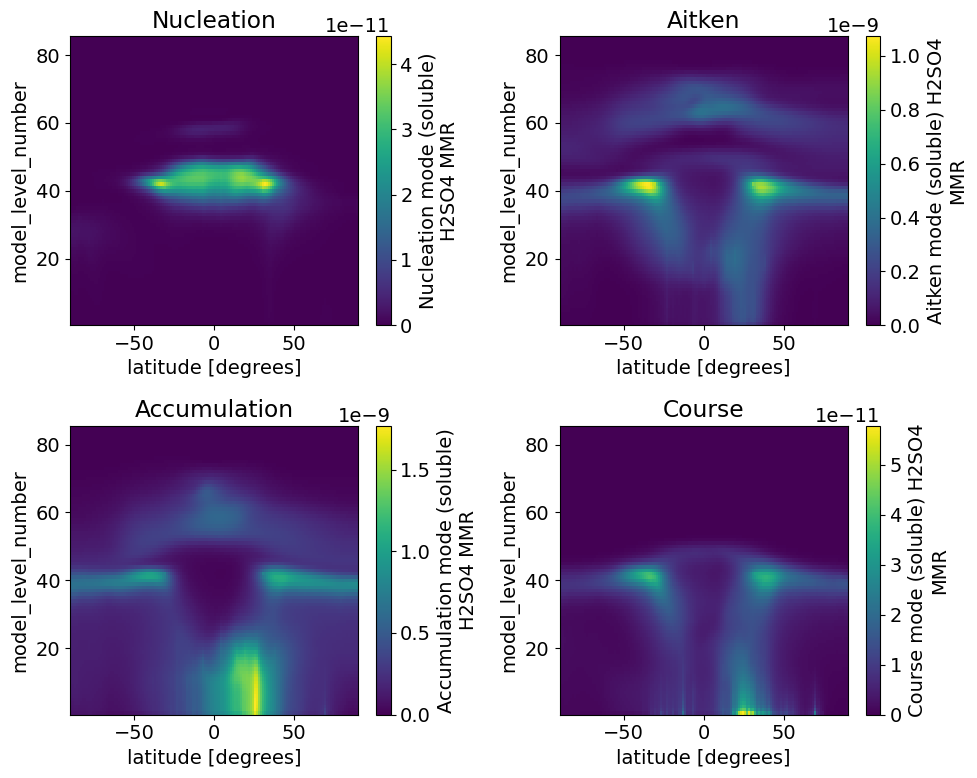

In [8]:

#ds['H2SO4 mass mixing ratio after tstep'].mean('longitude').plot()
i=0
fig, axs = plt.subplots(2,2, figsize=(10, 8))
for mode in modes:
    ax = axs.flatten()[i]
    #ds['{} mode (soluble) NUMBER'.format(mode)].mean('longitude').plot(ax=ax)
    ds['{} mode (soluble) H2SO4 MMR'.format(mode)].plot(ax=ax)
    ax.set_title(mode)
    i=i+1
plt.tight_layout()
plt.show()

In [9]:
def add_R_eff(ds):
    """ returns an xarray ds with the spatial and time resolved effective aerosol radius
    calculated as in Visioni 2023 https://acp.copernicus.org/articles/23/663/2023/acp-23-663-2023.html
    (their equations 1-3)
    """
       
    for mode in modes:
        # first get V_i by:
        # V_i = X_i/(Rho_s * N_i)
        # where:
        # X_i is MMR
        # Rho_s = 
        # N_i is number density in number per kg air. We have it as number per molecule air so need to convert
        ds['{} mode volume'.format(mode)] = (1/Rho_s)*ds['{} mode (soluble) H2SO4 MMR'.format(mode)]/(molecules_air_per_kg*ds['{} mode (soluble) NUMBER'.format(mode)])
        
        # second, get R_i by:
        # V_i = 4/3 pi R_i^3 * exp(9/2 * ln2(sigma_i))
        # sigma is the geometric standard deviation of the modes
        # V_i = c * R_i^3
        c = (4/3) * np.pi * np.exp((9/2)*(np.log(sigma[mode])**2))
        ds['{} mode radius'.format(mode)] = np.cbrt((1/c)*ds['{} mode volume'.format(mode)])
    
    a = (ds['Nucleation mode radius']**3)*(molecules_air_per_kg*ds['Nucleation mode (soluble) NUMBER']) + (ds['Aitken mode radius']**3)*(molecules_air_per_kg*ds['Aitken mode (soluble) NUMBER']) + (ds['Accumulation mode radius']**3)*(molecules_air_per_kg*ds['Accumulation mode (soluble) NUMBER']) + (ds['Course mode radius']**3)*(molecules_air_per_kg*ds['Course mode (soluble) NUMBER'])
    b = (ds['Nucleation mode radius']**2)*(molecules_air_per_kg*ds['Nucleation mode (soluble) NUMBER']) + (ds['Aitken mode radius']**2)*(molecules_air_per_kg*ds['Aitken mode (soluble) NUMBER']) + (ds['Accumulation mode radius']**2)*(molecules_air_per_kg*ds['Accumulation mode (soluble) NUMBER']) + (ds['Course mode radius']**2)*(molecules_air_per_kg*ds['Course mode (soluble) NUMBER'])
    ds['R_eff'] = a/b
    return ds


Text(0.02, 0.5, 'Altitude (km)')

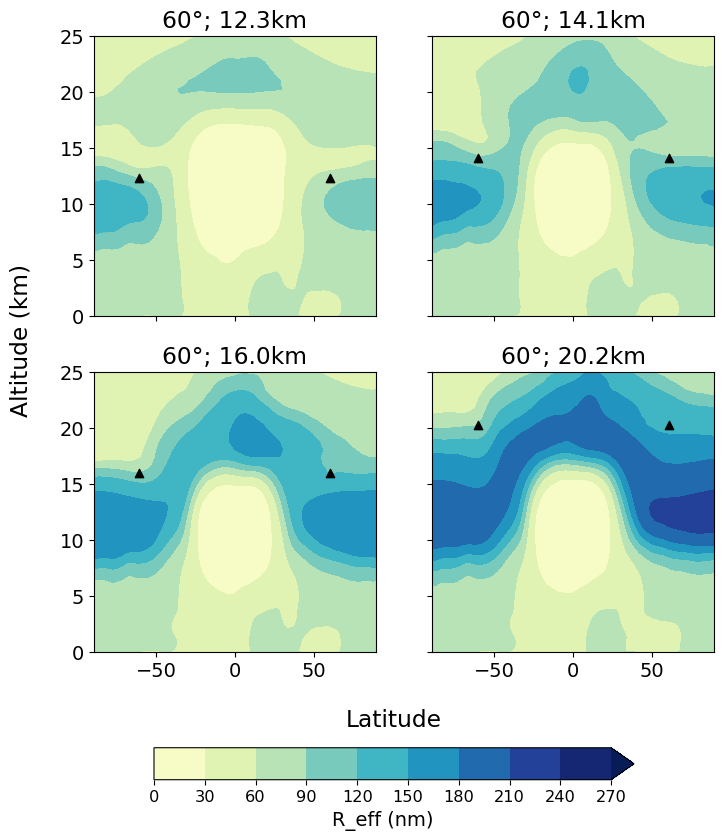

In [11]:
fig, axs = plt.subplots(2, 2, 
                        figsize= (8, 8),
                        sharex=True, sharey=True)

runs = ['u-de018', 'u-de026', 'u-de050', 'u-de457']

i=0
for run in runs:
    ds = add_R_eff(ds_dict[run])
    ax = axs.flatten()[i]
    cs=ax.contourf(ds.latitude.values, 0.001*ds.level_height.values, 1E9*ds['R_eff'].values,
                   levels = np.arange(0, 300, 30),
                   cmap='YlGnBu',
                   extend='max')
    ax.set_ylim(0, 25)
    lat, alt = str(int(ds.injection_latitude.values.item())), str(ds.injection_altitude.values.item())
    ax.scatter([ds.injection_latitude.values.item(), -ds.injection_latitude.values.item()],
               [ds.injection_altitude.values.item(), ds.injection_altitude.values.item()],
               marker='^', color='black'
               )
    title = lat + '°; ' + alt + 'km' 
    ax.set_title(title)
    i=i+1

cbar_ax1 = fig.add_axes([0.2, -0.05, 0.6, 0.04])
cbar1 = fig.colorbar(cs, cax=cbar_ax1, orientation='horizontal', label='R_eff (nm)')
cbar1.ax.tick_params(labelsize='small')

fig.supxlabel('Latitude')
fig.supylabel('Altitude (km)')

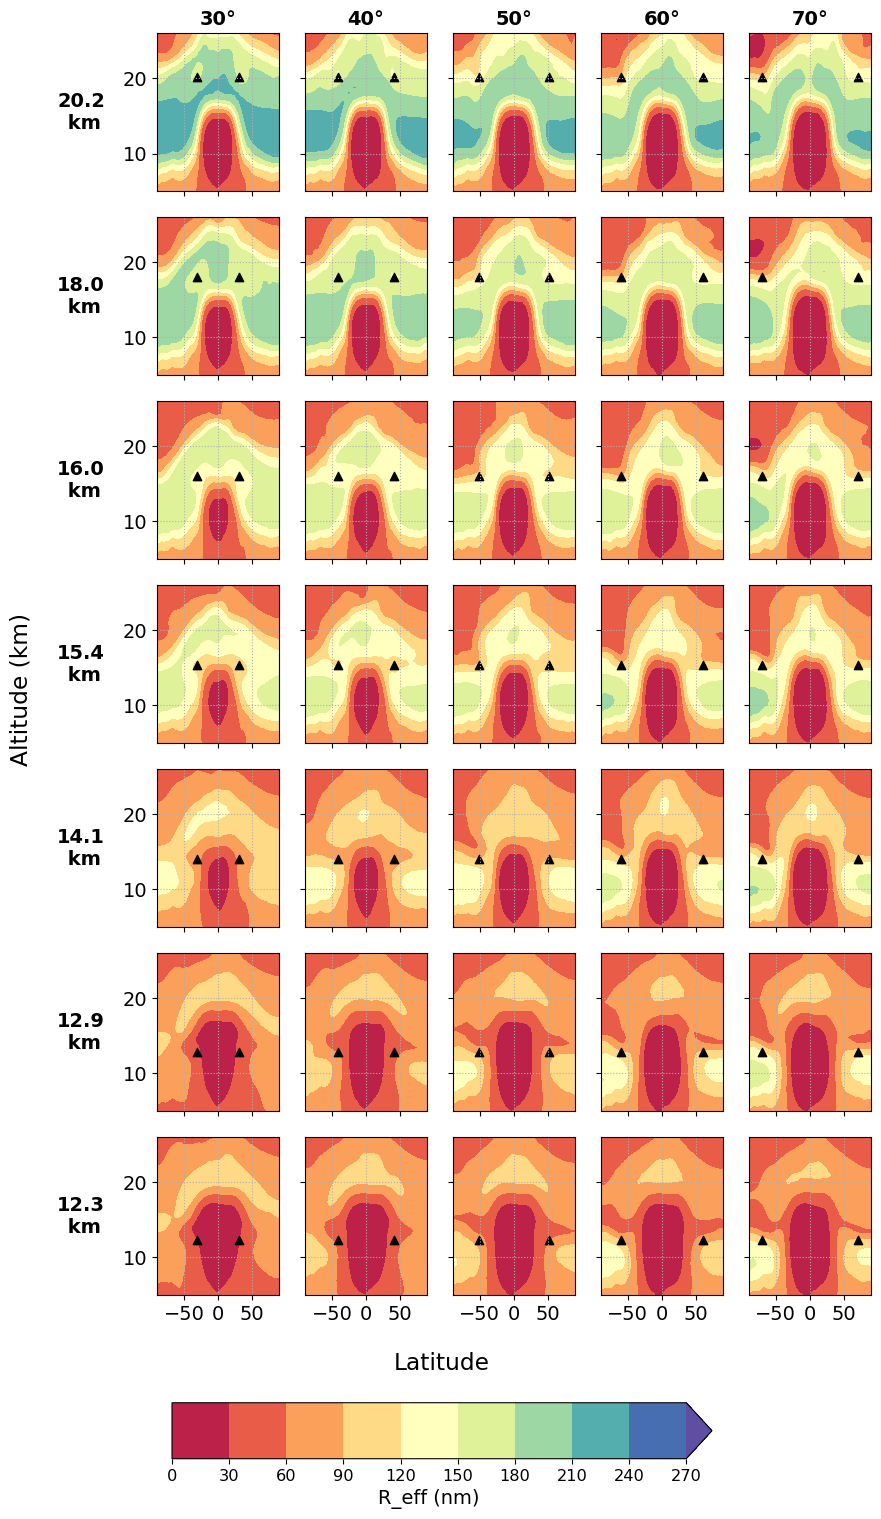

In [12]:
### repeat the above plot but for annual injection:
run_dict = {'u-de365':[30.625, 20.2],'u-de369':[40.625, 20.2],'u-de399':[50.625, 20.2],'u-de457':[60.625, 20.2],'u-dg655':[70.625, 20.2],
            'u-de350':[30.625, 18.0],'u-de187':[40.625, 18.0],'u-de013':[50.625, 18.0],'u-de052':[60.625, 18.0],'u-dg552':[70.625, 18.0],
            'u-de349':[30.625, 16.0],'u-de145':[40.625, 16.0],'u-de012':[50.625, 16.0],'u-de050':[60.625, 16.0],'u-dg549':[70.625, 16.0],  
            'u-de517':[30.625, 15.4],'u-de505':[40.625, 15.4],'u-de506':[50.625, 15.4],'u-de633':[60.625, 15.4],'u-dg028':[70.625, 15.4],
            'u-de348':[30.625, 14.1],'u-de111':[40.625, 14.1],'u-dd989':[50.625, 14.1],'u-de026':[60.625, 14.1],'u-dg309':[70.625, 14.1],
            'u-df777':[30.625, 12.9],'u-de636':[40.625, 12.9],'u-de593':[50.625, 12.9],'u-de567':[60.625, 12.9],'u-df710':[70.625, 12.9],
            'u-dg683':[30.625, 12.3],'u-de110':[40.625, 12.3],'u-dd987':[50.625, 12.3],'u-de018':[60.625, 12.3], 'u-dg027':[70.625, 12.3],
           }

fig, axs = plt.subplots(7, 5, figsize=(9, 14),
                        sharex='all', sharey='all')
i=0
for run in run_dict.keys():
    ax = axs.flatten()[i]
    if run_dict[run][0]==30.625:
        height = run_dict[run][1]
        ax.set_ylabel(str(str(height)+'\n km'),
                      loc = 'center', va='center', 
                      rotation=0, labelpad = 30, weight='bold')
        
    if i < 5:
        ax.set_title(str(str(int(run_dict[run][0]))+'°'), 
                     fontsize='medium', weight='bold')
    
    ds = add_R_eff(ds_dict[run])
    
    cs=ax.contourf(ds.latitude.values, 
                   0.001*ds.level_height.values, 
                   1E9*ds['R_eff'].values,
                   levels = np.arange(0, 300, 30),
                   cmap='Spectral',
                   extend='max')
    ax.set_ylim(5, 26)
    ax.scatter([ds.injection_latitude.values.item(), -ds.injection_latitude.values.item()],
               [ds.injection_altitude.values.item(), ds.injection_altitude.values.item()],
               marker='^', color='black'
               )
    ax.grid(ls='dotted')
    i=i+1
    
fig.supxlabel('Latitude')
fig.supylabel('Altitude (km)' )

plt.tight_layout()

cbar_ax1 = fig.add_axes([0.2, -0.05, 0.6, 0.04])
cbar1 = fig.colorbar(cs, cax=cbar_ax1, orientation='horizontal', label='R_eff (nm)')
cbar1.ax.tick_params(labelsize='small')
plt.savefig('Figures/Extra/R_eff_zonal_height_all.jpg', dpi=450, bbox_inches='tight')
plt.show()

In [13]:
background_dir = '/badc/cmip6/data/CMIP6/ScenarioMIP/MOHC/UKESM1-0-LL/ssp245/r1i1p1f2/AERmon/mmrso4/gn/latest/'
ds_background_mmr = xr.open_mfdataset(background_dir+os.listdir(background_dir)[0]).mean('lon')
ds_background_mmr = ds_background_mmr.sel(time=slice('2021', '2051'))
ds_background_mmr =ds_background_mmr.resample(time="Y").mean().load()
ds_background_mmr_std = ds_background_mmr.mmrso4.std('time')
ds_background_mmr_mean = ds_background_mmr.mmrso4.mean('time')


ds_background_mmr_H2SO4_std = (ds_background_mmr_std*(1/0.9796)).rename({'lev':'model_level_number', 'lat':'latitude'})
ds_background_mmr_H2SO4_mean = (ds_background_mmr_mean*(1/0.9796)).rename({'lev':'model_level_number', 'lat':'latitude'})

import scipy.stats as stats
sample_size=(2051-2021)
standard_error = ds_background_mmr_H2SO4_std / np.sqrt(sample_size)
# Find the critical t-value for 95% confidence (two-tailed)
alpha = 0.05
t_critical = stats.t.ppf(1 - alpha / 2, df=sample_size - 1)
# Calculate the threshold anomaly that would exceed the threshold
threshold_anom = t_critical * standard_error

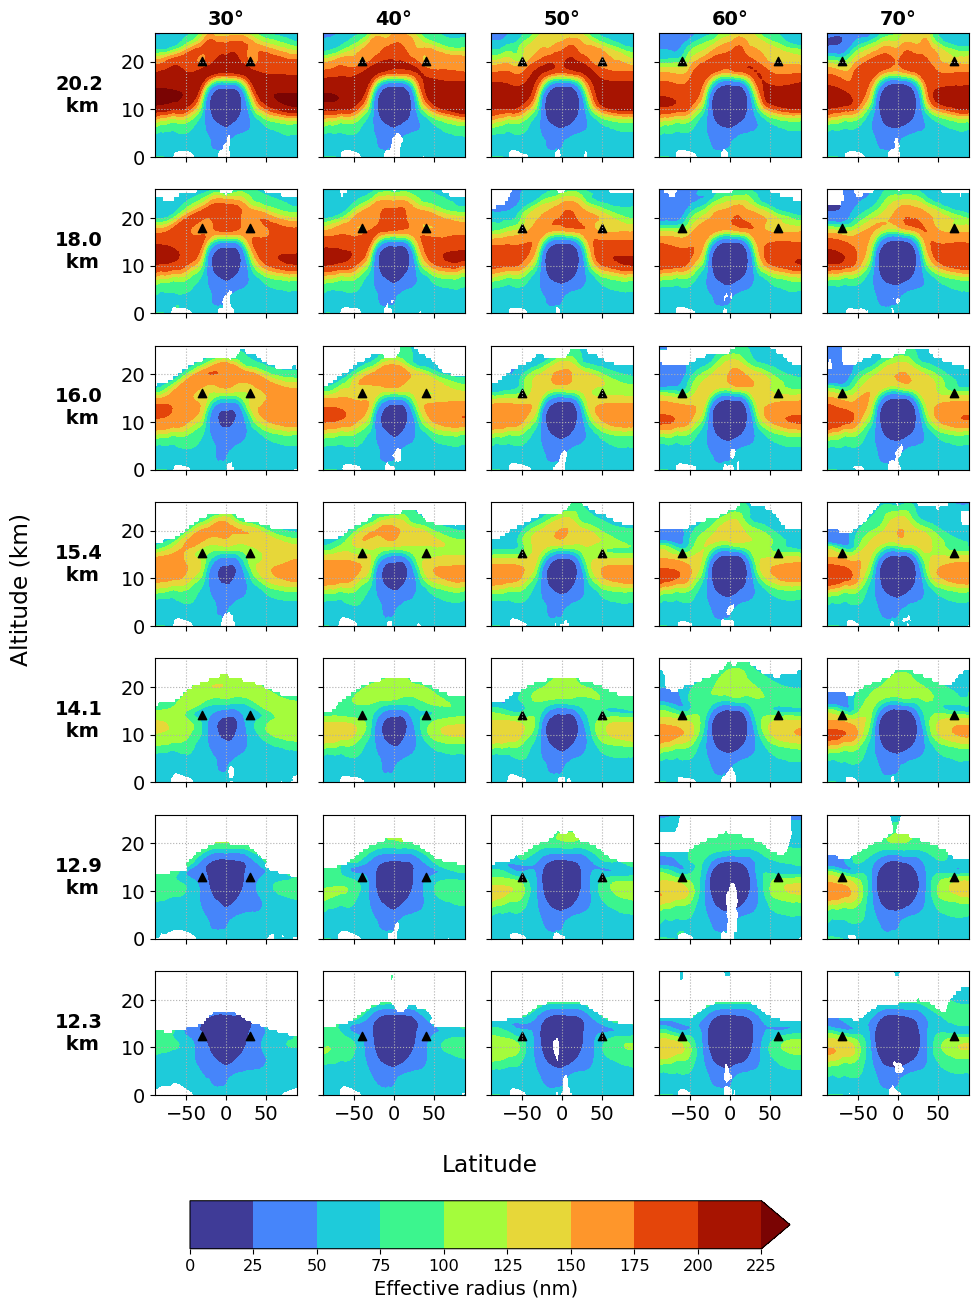

In [13]:
### repeat the above plot but for annual injection:
run_dict = {'u-de365':[30.625, 20.2],'u-de369':[40.625, 20.2],'u-de399':[50.625, 20.2],'u-de457':[60.625, 20.2],'u-dg655':[70.625, 20.2],
            'u-de350':[30.625, 18.0],'u-de187':[40.625, 18.0],'u-de013':[50.625, 18.0],'u-de052':[60.625, 18.0],'u-dg552':[70.625, 18.0],
            'u-de349':[30.625, 16.0],'u-de145':[40.625, 16.0],'u-de012':[50.625, 16.0],'u-de050':[60.625, 16.0],'u-dg549':[70.625, 16.0],  
            'u-de517':[30.625, 15.4],'u-de505':[40.625, 15.4],'u-de506':[50.625, 15.4],'u-de633':[60.625, 15.4],'u-dg028':[70.625, 15.4],
            'u-de348':[30.625, 14.1],'u-de111':[40.625, 14.1],'u-dd989':[50.625, 14.1],'u-de026':[60.625, 14.1],'u-dg309':[70.625, 14.1],
            'u-df777':[30.625, 12.9],'u-de636':[40.625, 12.9],'u-de593':[50.625, 12.9],'u-de567':[60.625, 12.9],'u-df710':[70.625, 12.9],
            'u-dg683':[30.625, 12.3],'u-de110':[40.625, 12.3],'u-dd987':[50.625, 12.3],'u-de018':[60.625, 12.3], 'u-dg027':[70.625, 12.3],
           }

fig, axs = plt.subplots(7, 5, figsize=(10, 12),
                        sharex='all', sharey='all')
i=0
for run in run_dict.keys():
    ax = axs.flatten()[i]
    if run_dict[run][0]==30.625:
        height = run_dict[run][1]
        ax.set_ylabel(str(str(height)+'\n km'),
                      loc = 'center', va='center', 
                      rotation=0, labelpad = 30, weight='bold')
        
    if i < 5:
        ax.set_title(str(str(int(run_dict[run][0]))+'°'), 
                     fontsize='medium', weight='bold')
    
    ds = add_R_eff(ds_dict[run])

    ds['total_mmr'] = ds['Nucleation mode (soluble) H2SO4 MMR'] + ds['Aitken mode (soluble) H2SO4 MMR'] + ds['Accumulation mode (soluble) H2SO4 MMR'] + ds['Course mode (soluble) H2SO4 MMR']
    ds['total_mmr_anom'] = ds['total_mmr']
    ds['total_mmr_anom'].values = ds['total_mmr'].values - ds_background_mmr_H2SO4_mean.values
    ds['total_mmr_threshold_anom'] = ds['total_mmr']
    ds['total_mmr_threshold_anom'].values = threshold_anom.values
    masked_ds = ds.where(ds['total_mmr_anom'] > ds['total_mmr_threshold_anom'])
        
    cs=ax.contourf(masked_ds.latitude.values, 
                   0.001*masked_ds.level_height.values, 
                   1E9*masked_ds['R_eff'].values,
                   levels = np.arange(0, 250, 25),
                   cmap='turbo',
                   extend='max')
    ax.set_ylim(0, 26)
    ax.scatter([ds.injection_latitude.values.item(), -ds.injection_latitude.values.item()],
               [ds.injection_altitude.values.item(), ds.injection_altitude.values.item()],
               marker='^', color='black'
               )
    ax.grid(ls='dotted')
    i=i+1
    
fig.supxlabel('Latitude')
fig.supylabel('Altitude (km)' )

plt.tight_layout()

cbar_ax1 = fig.add_axes([0.2, -0.05, 0.6, 0.04])
cbar1 = fig.colorbar(cs, cax=cbar_ax1, orientation='horizontal', label='Effective radius (nm)')
cbar1.ax.tick_params(labelsize='small')
plt.savefig('Figures/Supp/R_eff_zonal_height_sigmask.jpg', dpi=450, bbox_inches='tight')
plt.show()

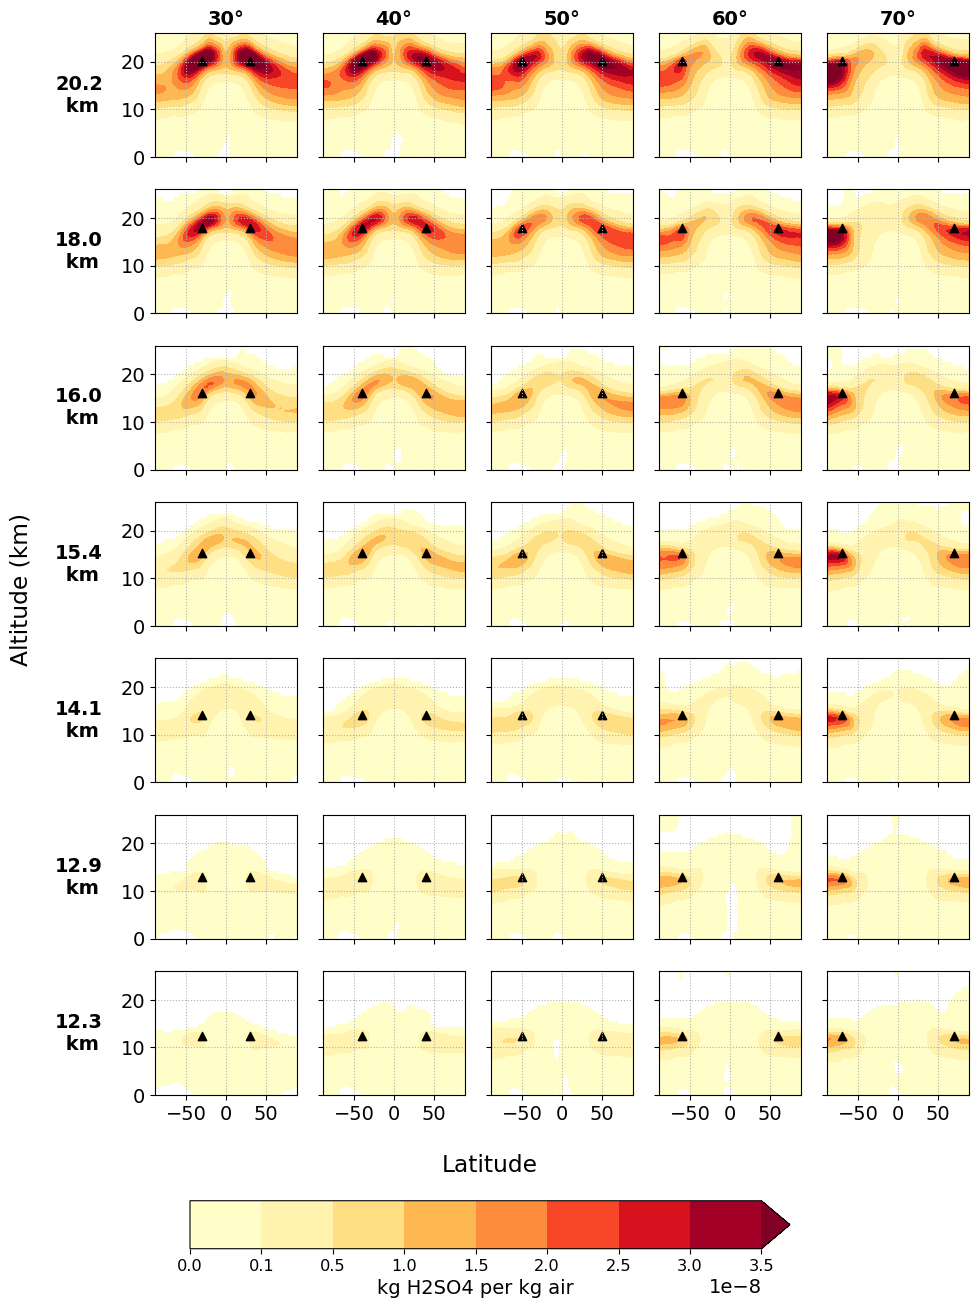

In [14]:
### repeat the above plot but for burden:
run_dict = {'u-de365':[30.625, 20.2],'u-de369':[40.625, 20.2],'u-de399':[50.625, 20.2],'u-de457':[60.625, 20.2],'u-dg655':[70.625, 20.2],
            'u-de350':[30.625, 18.0],'u-de187':[40.625, 18.0],'u-de013':[50.625, 18.0],'u-de052':[60.625, 18.0],'u-dg552':[70.625, 18.0],
            'u-de349':[30.625, 16.0],'u-de145':[40.625, 16.0],'u-de012':[50.625, 16.0],'u-de050':[60.625, 16.0],'u-dg549':[70.625, 16.0],  
            'u-de517':[30.625, 15.4],'u-de505':[40.625, 15.4],'u-de506':[50.625, 15.4],'u-de633':[60.625, 15.4],'u-dg028':[70.625, 15.4],
            'u-de348':[30.625, 14.1],'u-de111':[40.625, 14.1],'u-dd989':[50.625, 14.1],'u-de026':[60.625, 14.1],'u-dg309':[70.625, 14.1],
            'u-df777':[30.625, 12.9],'u-de636':[40.625, 12.9],'u-de593':[50.625, 12.9],'u-de567':[60.625, 12.9],'u-df710':[70.625, 12.9],
            'u-dg683':[30.625, 12.3],'u-de110':[40.625, 12.3],'u-dd987':[50.625, 12.3],'u-de018':[60.625, 12.3], 'u-dg027':[70.625, 12.3],
           }

fig, axs = plt.subplots(7, 5, figsize=(10, 12),
                        sharex='all', sharey='all')
i=0
for run in run_dict.keys():
    ax = axs.flatten()[i]
    if run_dict[run][0]==30.625:
        height = run_dict[run][1]
        ax.set_ylabel(str(str(height)+'\n km'),
                      loc = 'center', va='center', 
                      rotation=0, labelpad = 30, weight='bold')
        
    if i < 5:
        ax.set_title(str(str(int(run_dict[run][0]))+'°'), 
                     fontsize='medium', weight='bold')
    
    ds = add_R_eff(ds_dict[run])

    ds['total_mmr'] = ds['Nucleation mode (soluble) H2SO4 MMR'] + ds['Aitken mode (soluble) H2SO4 MMR'] + ds['Accumulation mode (soluble) H2SO4 MMR'] + ds['Course mode (soluble) H2SO4 MMR']
    ds['total_mmr_anom'] = ds['total_mmr']
    ds['total_mmr_anom'].values = ds['total_mmr'].values - ds_background_mmr_H2SO4_mean.values
    ds['total_mmr_threshold_anom'] = ds['total_mmr']
    ds['total_mmr_threshold_anom'].values = threshold_anom.values
    masked_ds = ds.where(ds['total_mmr_anom'] > ds['total_mmr_threshold_anom'])
        
    cs=ax.contourf(masked_ds.latitude.values, 
                   0.001*masked_ds.level_height.values, 
                   masked_ds['total_mmr_anom'].values,
                   #levels = np.arange(0, 0.4*1E-7, 0.5*1E-8),
                   np.concatenate([[0, 0.1*1E-8], np.arange(0.5*1E-8, 0.4*1E-7, 0.5*1E-8)]),                   #levels = [0, 0.05*1E-8, 0.1*1E-8, 0.5*1E-8, 1*1E-8, 
                    #         2*1E-8, 3*1E-8, 5*1E-8],
                   #levels = [0, 0.05*1E-8, 0.1*1E-8, 0.2*1E-8, 0.4*1E-8, 
                    #         0.8*1E-8, 1.6*1E-8, 3.2*1E-8],
                   #cmap='Spectral',
                   cmap='YlOrRd',
                   extend='max')
    ax.set_ylim(0, 26)
    ax.scatter([ds.injection_latitude.values.item(), -ds.injection_latitude.values.item()],
               [ds.injection_altitude.values.item(), ds.injection_altitude.values.item()],
               marker='^', color='black'
               )
    ax.grid(ls='dotted')
    i=i+1
    
fig.supxlabel('Latitude')
fig.supylabel('Altitude (km)' )

plt.tight_layout()

cbar_ax1 = fig.add_axes([0.2, -0.05, 0.6, 0.04])
cbar1 = fig.colorbar(cs, cax=cbar_ax1, orientation='horizontal', label='kg H2SO4 per kg air')
cbar1.ax.tick_params(labelsize='small')
plt.savefig('Figures/Supp/MMR_H2SO4_total_zonal_height_sigmask.jpg', dpi=450, bbox_inches='tight')
plt.show()

In [29]:
### finally, save a copy of the [latitude] x [height] annual mean dat for each annually-constant run, for sharing:

run_dict = {'u-dg683':[30.625, 12.3],
            'u-df777':[30.625, 12.9],
            'u-de348':[30.625, 14.1],
            'u-de517':[30.625, 15.4],
            'u-de349':[30.625, 16.0],
            'u-de350':[30.625, 18.0],
            'u-de365':[30.625, 20.2],
            'u-de110':[40.625, 12.3],
            'u-de636':[40.625, 12.9],
            'u-de111':[40.625, 14.1],
            'u-de505':[40.625, 15.4],
            'u-de145':[40.625, 16.0],
            'u-de187':[40.625, 18.0],
            'u-de369':[40.625, 20.2],
            'u-dd987':[50.625, 12.3],
            'u-de593':[50.625, 12.9],
            'u-dd989':[50.625, 14.1],
            'u-de506':[50.625, 15.4],
            'u-de012':[50.625, 16.0],
            'u-de013':[50.625, 18.0],
            'u-de399':[50.625, 20.2],
            'u-de018':[60.625, 12.3],
            'u-de567':[60.625, 12.9],
            'u-de026':[60.625, 14.1],
            'u-de633':[60.625, 15.4],
            'u-de050':[60.625, 16.0],
            'u-de052':[60.625, 18.0],
            'u-de457':[60.625, 20.2],
            'u-dg027':[70.625, 12.3],
            'u-df710':[70.625, 12.9],
            'u-dg309':[70.625, 14.1],
            'u-dg028':[70.625, 15.4],
            'u-dg549':[70.625, 16.0],
            'u-dg552':[70.625, 18.0],
            'u-dg655':[70.625, 20.2],
           }
from tqdm import tqdm
for run in tqdm(run_dict.keys()):   
    
    sharing_archive_path = '/gws/nopw/j04/cpom/aduffey/LAHLSAI_pp_archive/'
    outpath = sharing_archive_path + run + '/' + 'Burden_and_Reff_zonal/'
    name = '/Burden_and_Reff_zonal_2036_{r}.nc'.format(r=run)
    
    if not os.path.exists(outpath):
        os.makedirs(outpath)
    
    ds = get_ds(run, 'burdens_3d_with_modes')
    ds = ds.sel(time='2036').mean(dim=['longitude', 'time'])
    ds = add_R_eff(ds_dict[run])
    
    ds['H2SO4_all_mode_soluble_mmr'] = ds['Nucleation mode (soluble) H2SO4 MMR'] + ds['Aitken mode (soluble) H2SO4 MMR'] + ds['Accumulation mode (soluble) H2SO4 MMR'] + ds['Course mode (soluble) H2SO4 MMR']
    ds_out = ds[['H2SO4_all_mode_soluble_mmr', 'R_eff']]
    
    attrs_dict = {'Author': 'Alistair Duffey, University College London, alistair.duffey.21@ucl.ac.uk',
                  'Date':'October 2024',
                  'Model':'UKESM1.0',
                  'Simulation design':'Branched from SSP2-4.5 in 2035, with injection of 12Tg SO2 total across two injection locations per year',
                  'Year':2036,
                  'H2SO4_all_mode_soluble_mmr definition':'Sum of Nucleation mode (soluble) H2SO4 MMR, Aitken mode (soluble) H2SO4 MMR, Accumulation mode (soluble) H2SO4 MMR, and Course mode (soluble) H2SO4 MMR; (Units: kg per kg air)',
                  'R_eff definition':'The area-weighted mean aerosol radius (m)'}
    
    ds_out = ds_out.assign_attrs(attrs_dict)
    ds_out.to_netcdf(outpath+name)

100%|██████████| 35/35 [00:00<00:00, 55.43it/s]
